In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\ADITH SREE RAM\Desktop\research\data\stroke.csv', sep = ',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

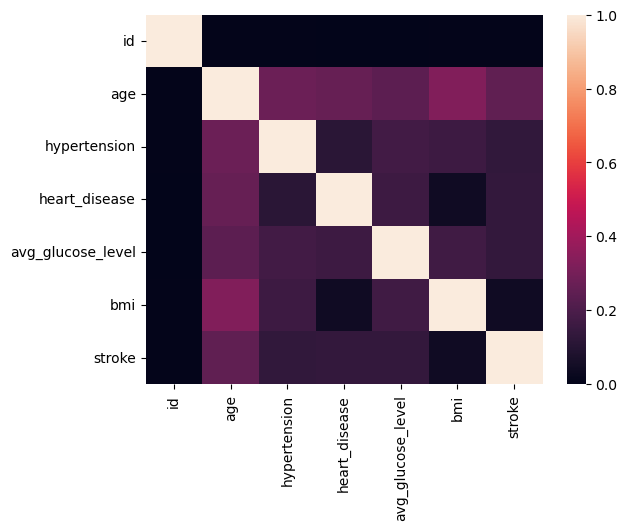

In [7]:
corr = df.corr()

sns.heatmap(corr)

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [9]:
print(df['work_type'].unique())
print(df['smoking_status'].unique())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [12]:
print(df['work_type'].unique())
print(df['smoking_status'].unique())

[2 3 0 4 1]
[1 2 3 0]


In [13]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


In [14]:
#ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
#x = np.array(ct.fit_transform(x))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 10)
Number transations x_test df (1022, 10)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


In [16]:
# SMOTE 
# pip install imblearn
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [17]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 10)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


In [18]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='error')])
models.append(['Logistic Regression',LogisticRegression(random_state=42)])
models.append(['SVM',SVC(random_state=42)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['Gradient Boost',GradientBoostingClassifier(random_state=42)])
models.append(['DecisionTree',DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)])
models.append(['RandomForest',RandomForestClassifier(random_state=42)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [19]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation


    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    #lst_2.append(models[m][0])
    lst_1.append(accuracy_score(y_test,y_pred))

XGBClassifier :
[[965   3]
 [ 51   3]]
Accuracy Score:  0.9471624266144814

Logistic Regression :
[[751 217]
 [ 16  38]]
Accuracy Score:  0.7720156555772995

SVM :
[[693 275]
 [ 12  42]]
Accuracy Score:  0.7191780821917808

KNeigbors :
[[806 162]
 [ 27  27]]
Accuracy Score:  0.815068493150685

GaussianNB :
[[726 242]
 [ 15  39]]
Accuracy Score:  0.7485322896281801

Gradient Boost :
[[957  11]
 [ 52   2]]
Accuracy Score:  0.9383561643835616

DecisionTree :
[[708 260]
 [ 12  42]]
Accuracy Score:  0.7338551859099804

RandomForest :
[[964   4]
 [ 52   2]]
Accuracy Score:  0.9452054794520548

AdaBoostClassifier :
[[941  27]
 [ 47   7]]
Accuracy Score:  0.9275929549902152



In [20]:
model = ['XGB', 'Logistic Regression', 'SVM', 'KNN', 'GNB', 'Gradient Boost', 'Desicion Tree', 'Random Forest', 'AdaBoost']

In [21]:
lst_1

[0.9471624266144814,
 0.7720156555772995,
 0.7191780821917808,
 0.815068493150685,
 0.7485322896281801,
 0.9383561643835616,
 0.7338551859099804,
 0.9452054794520548,
 0.9275929549902152]

In [22]:
df1 = pd.DataFrame(list(zip(model, lst_1)),
               columns =['Models', 'Accuracy'])
df1 = df1.sort_values(by = "Accuracy", ascending=False)
df1

,Models,Accuracy
0,XGB,0.947162
7,Random Forest,0.945205
5,Gradient Boost,0.938356
8,AdaBoost,0.927593
3,KNN,0.815068
1,Logistic Regression,0.772016
4,GNB,0.748532
6,Desicion Tree,0.733855
2,SVM,0.719178


Text(0.5, 1.0, 'Model Vs Accuracy for Stroke')

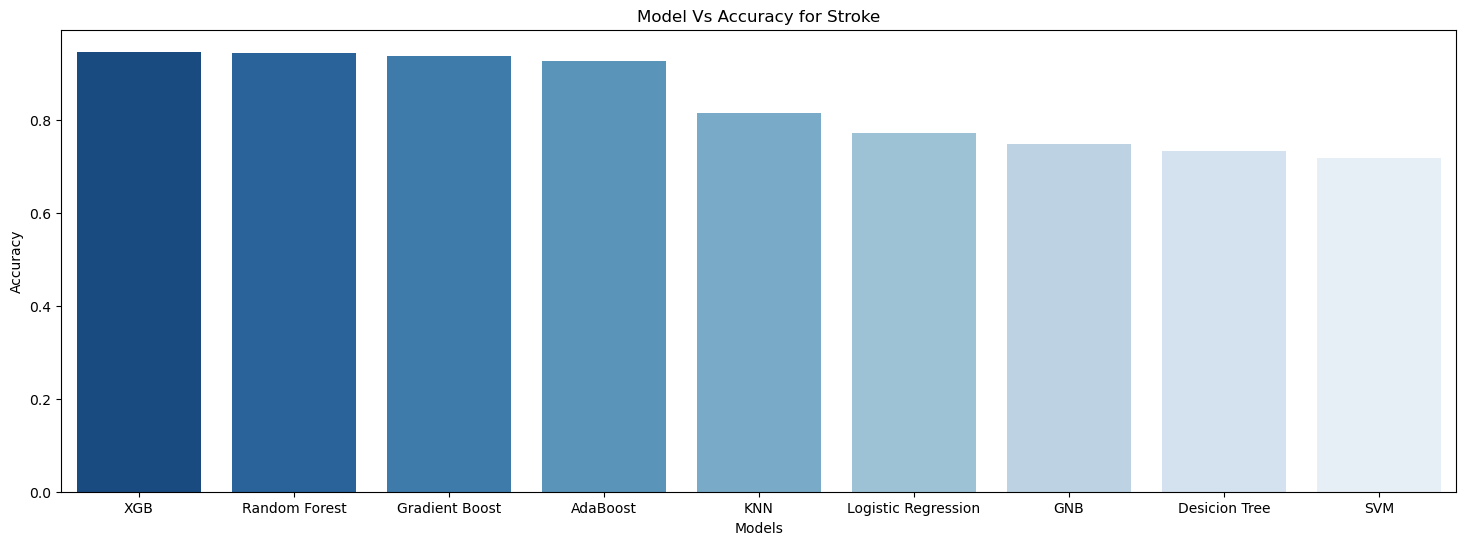

In [28]:
plt.figure(figsize=(18,6))
sns.barplot(df1, x = 'Models', y = 'Accuracy', palette = 'Blues_r')
plt.title("Model Vs Accuracy for Stroke")

In [24]:
best_model = XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='error')
predictor_xgb = best_model.fit(X_train, y_train)
y_pred = predictor_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
accuracy_xgb

0.9442270058708415

In [25]:
import joblib
file = open("stroke_model", "wb")
joblib.dump(best_model,file)
file.close()